In [1]:
import matplotlib.pyplot as plt
import numpy as np

from microlensing.IPM.ipm import IPM

from microlensing.Lightcurves import lightcurves
from microlensing.SourceProfiles import uniform_disk, gaussian

# Creating a magnification map

In [2]:
ipm = IPM(verbose=1,
          kappa_tot=0.4, shear=0.4, kappa_star=0.2, 
          half_length_y1=25, half_length_y2=25, 
          num_pixels_y1=5000, num_pixels_y2=5000
          )
ipm.random_seed = 0
ipm.run()

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.064 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.064 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 3.139 seconds.



# Creating quasar lightcurves

In [3]:
# create a single source profile, a Gaussian with 99.9% of the flux inside a 50 pixel radius
source = gaussian.Gaussian(50)

# a source track that starts at (-10,-7) and travels 20 units right and 9 units up
positions = np.array([-10,-7]) + np.linspace(0,1,1000)[:,None] * [20,9]

lc = lightcurves.constant_source(ipm, source, positions)

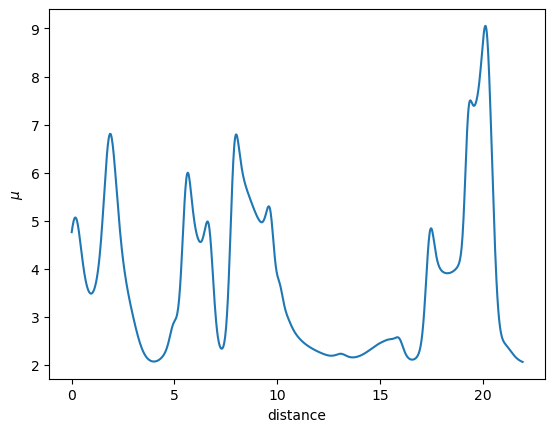

In [4]:
fig, ax = plt.subplots()

distance = np.linalg.norm(positions - positions[0], axis=1)
ax.plot(distance, lc)

ax.set_xlabel('distance')
ax.set_ylabel('$\\mu$')

plt.show()

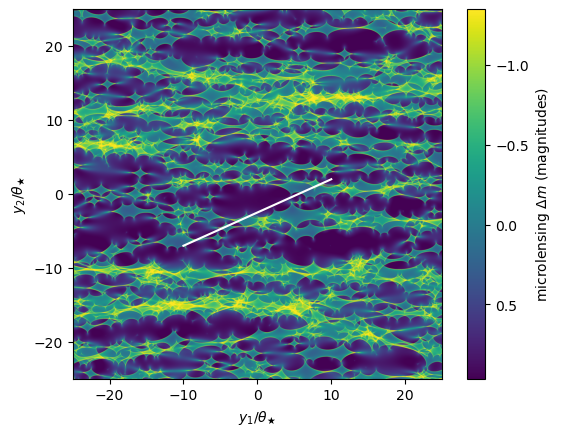

In [5]:
fig, ax = plt.subplots()
ipm.plot(ax)
ax.plot(*positions.T, color='white')
plt.show()

In [6]:
# two different tracks for a uniform disk profile instead of a Gaussian
source = uniform_disk.UniformDisk(50)

positions = np.array([np.array([-10,-7]) + np.linspace(0,1,1000)[:,None] * [6,9],
                      np.array([5,3]) + np.linspace(0,1,1000)[:,None] * [-13,12]])

lcs = lightcurves.constant_source(ipm, source, positions)

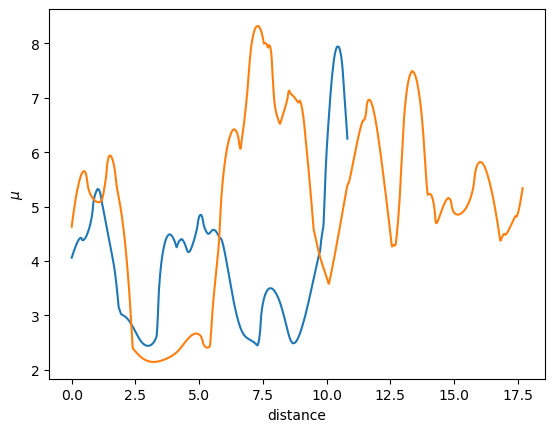

In [7]:
fig, ax = plt.subplots()

for p, lc in zip(positions, lcs):
    dists = np.linalg.norm(p - p[0], axis=1)
    ax.plot(dists, lc)

ax.set_xlabel('distance')
ax.set_ylabel('$\\mu$')

plt.show()

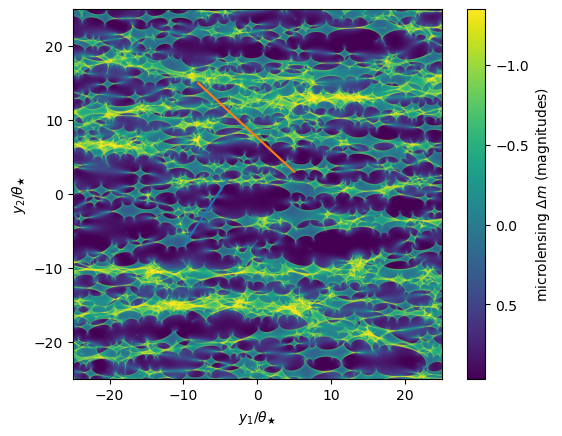

In [8]:
fig, ax = plt.subplots()
ipm.plot(ax)
ax.plot(*positions.T)
plt.show()